In [14]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [15]:
data = pd.read_csv("data.csv")
pd.read_excel('cultivars_description.ods')
data

FileNotFoundError: [Errno 2] No such file or directory: 'cultivars_description.ods'

In [3]:
# Stratified cross validation (cultivars became proportional to each other) (recommended by the dataset author)
x = data.drop('Cultivar', axis=1)
y = data['Cultivar']
# One-hot encoding
data = pd.get_dummies(x, drop_first=True)
data

,Season,Repetition,PH,IFP,NLP,NGP,NGL,NS,MHG,GY
0,1,1,58.80,15.20,98.20,177.80,1.81,5.20,152.20,3232.820000
1,1,2,58.60,13.40,102.00,195.00,1.85,7.20,141.69,3517.360000
2,1,3,63.40,17.20,100.40,203.00,2.02,6.80,148.81,3391.460000
3,1,4,60.27,15.27,100.20,191.93,1.89,6.40,148.50,3312.580000
4,1,1,81.20,18.00,98.80,173.00,1.75,7.40,145.59,3230.990000
...,...,...,...,...,...,...,...,...,...,...
315,2,4,88.33,16.33,75.73,139.00,1.84,3.67,135.19,3348.931034
316,2,1,64.40,16.60,76.00,168.00,2.21,3.60,145.69,3418.850575
317,2,2,64.60,17.60,116.80,271.20,2.32,3.80,147.24,3651.586207
318,2,3,58.80,14.80,86.40,180.60,2.09,2.20,156.32,3487.931034


In [4]:
# Scaling the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)
data

,Season,Repetition,PH,IFP,NLP,NGP,NGL,NS,MHG,GY
0,1,1,58.80,15.20,98.20,177.80,1.81,5.20,152.20,3232.820000
1,1,2,58.60,13.40,102.00,195.00,1.85,7.20,141.69,3517.360000
2,1,3,63.40,17.20,100.40,203.00,2.02,6.80,148.81,3391.460000
3,1,4,60.27,15.27,100.20,191.93,1.89,6.40,148.50,3312.580000
4,1,1,81.20,18.00,98.80,173.00,1.75,7.40,145.59,3230.990000
...,...,...,...,...,...,...,...,...,...,...
315,2,4,88.33,16.33,75.73,139.00,1.84,3.67,135.19,3348.931034
316,2,1,64.40,16.60,76.00,168.00,2.21,3.60,145.69,3418.850575
317,2,2,64.60,17.60,116.80,271.20,2.32,3.80,147.24,3651.586207
318,2,3,58.80,14.80,86.40,180.60,2.09,2.20,156.32,3487.931034


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows wi

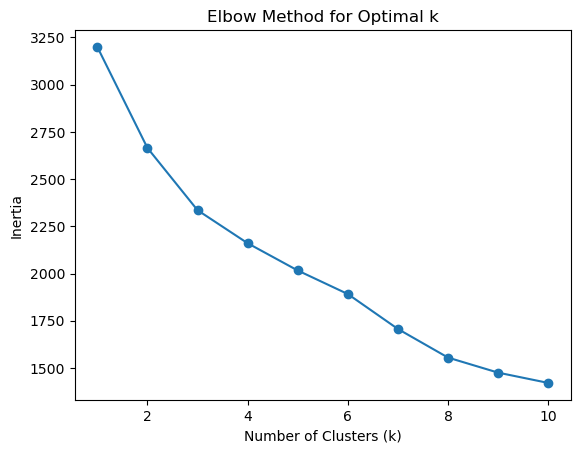

In [5]:
# Determining the most optimal K using both elbow method and silhouette score
# Elbow method
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42) #the Answer to the Ultimate Question of Life, the Universe and Everything.
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

In [6]:
# Reducing features to 2 using PCA for better clustering and data visualization
pca = PCA(n_components=2)  # Reduce to 2D for better clustering
reduced_data = pca.fit_transform(scaled_data)  
# Silhouette score
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(reduced_data)
    score = silhouette_score(reduced_data, labels)
    print(f'K={k}, Silhouette Score: {score:.4f}')

K=2, Silhouette Score: 0.4330
K=3, Silhouette Score: 0.3863
K=4, Silhouette Score: 0.4195
K=5, Silhouette Score: 0.4067
K=6, Silhouette Score: 0.3661
K=7, Silhouette Score: 0.3899
K=8, Silhouette Score: 0.3669
K=9, Silhouette Score: 0.3585
K=10, Silhouette Score: 0.3680


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows wi

In [7]:
# K=2 from elbow method and silhouette score(0.4330)
kmeans = KMeans(n_clusters=2, random_state=42)
labels = kmeans.fit_predict(scaled_data) 

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


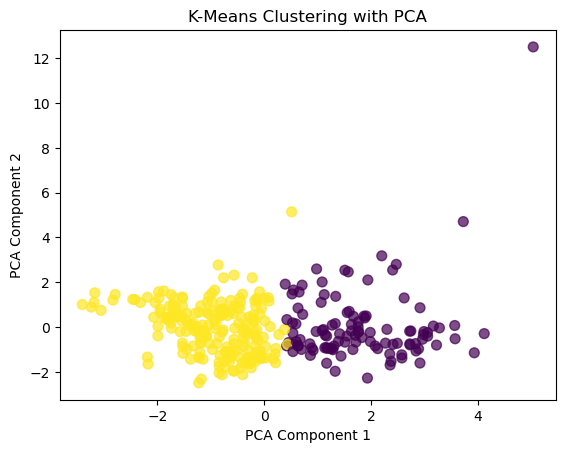

In [8]:
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=labels, s=50, alpha=0.7)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('K-Means Clustering with PCA')
plt.show()